In [5]:
from scipy import *
from scipy import sparse
from pylab import *
from matplotlib.pyplot import *
import os

<Figure size 432x288 with 0 Axes>

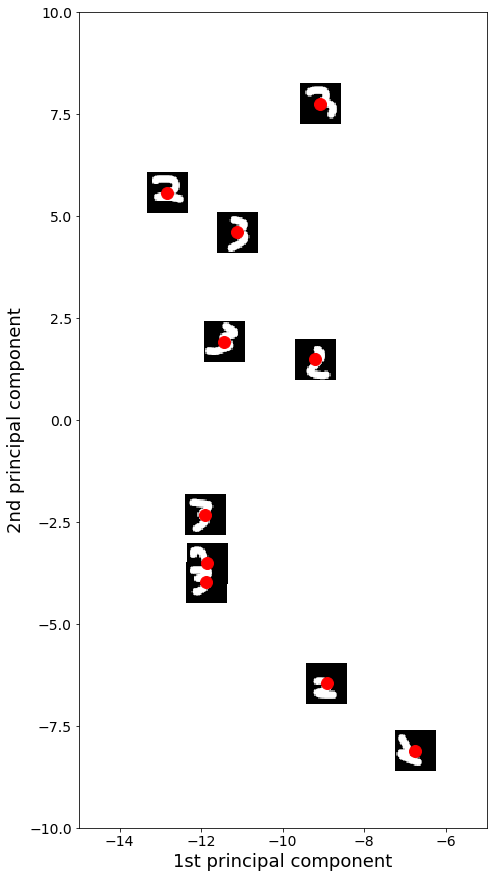

In [6]:
img_list = []

# Read in 10 images (30x30) and expand each image as a single row vector (1x900).
# Then stick all 10 row vectors together to get a final 10x900 matrix.
for i in range(10):
    img = imread(os.path.join("images/PCA_2D_Visual/", str(i + 1) + ".png"))[:,:,0]
    img_list.append(img)
    if i == 0:
        img_rs = resize(img,(1,size(img)))
    else:
        img_rs_temp = resize(img,(1,size(img)))
        img_rs = append(img_rs, img_rs_temp, axis=0)

# SVD and truncate to the 2nd order.
U, S, V = svd(img_rs)
k = 2
Z = dot(U[:,:k], eye(k) * S[:k])

gray() # show image with gray scale.
fig, ax = plt.subplots(figsize=(15, 15))
# Show all images first. Here the coordinate of each image is just the 1st and 2nd 
# component of PCA, i. e, images sit together with their 2D representation points.
for i in range(10):
    ax.imshow(img_list[i], aspect='auto', extent=(Z[i, 0] - 0.5,
                                                  Z[i, 0] + 0.5,
                                                  Z[i, 1] - 0.5,
                                                  Z[i, 1] + 0.5),
              zorder=-1)

# Plot the 2D representation points of images, which is basically the 1st and 2nd PCA components.
ax.plot(Z[:,0], Z[:,1], 'ro', markersize=12)
ax.set_xlim(-15,-5)
ax.set_ylim(-10,10)
ax.set_aspect('equal')
ax.set_xlabel("1st principal component", fontsize=18)
ax.set_ylabel("2nd principal component", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

show()